## Halloween Candy Analysis 

**Goal:** Use data to find the 3 types of Halloween candy that will make you the most popular house on the street.

**Details:** Using online votes ranking 85 types of candy, the task is to find the 3 treats to give out on Halloween this year to guarantee that trick-or-treaters of all tastes find something they'll love and present the data to back up your decision. 

#### My Approach 

1. **Python:** View the data
2. **Python:** Apply PCA and jitter to prepare the data for a scatter plot
3. **Tableau:** Explore the scatter plot and make recommendations 

### 1. View the Data

In [16]:
import pandas as pd

data = pd.read_csv("candy-data.csv")

In [18]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [22]:
subset = data.iloc[:, 1:-3]
subset.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


### 2. Apply Principal Component Analysis (PCA) 

- Start with many columns of data and reduce them to fewer columns that capture what's going on in the dataset 
- Reducing data to 2-3 columns allows you to plot all data points on 2D or 3D plots, e.g. A single scatter plot 
- You can see patterns and relationships between data points 
- Sci-kit learn is a Python library that enables application of Machine Learning algorithms
- Principal Component = most significant component of the dataset

In [29]:
from sklearn.decomposition import PCA 

In [31]:
pca = PCA(n_components=2)

In [33]:
pca.fit(subset) # Apply PCA to bring dataset from 9 cols/dimensions to 2 cols/dimensions for scatter plotting

PCA(n_components=2)

In [43]:
pca.explained_variance_ratio_ 

array([0.45736631, 0.15454393])

In [41]:
candy_2d = pd.DataFrame(pca.transform(subset))
candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='0', ylabel='1'>

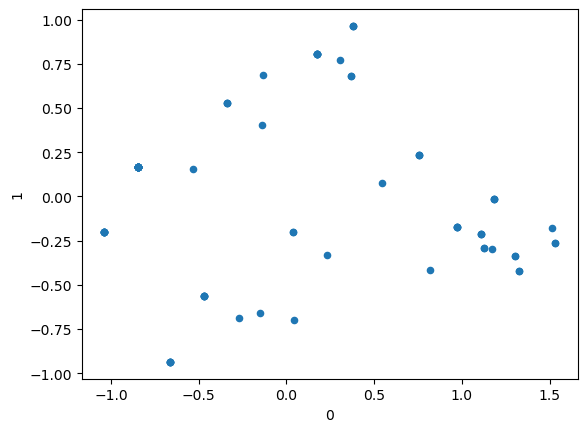

In [45]:
candy_2d.plot(kind = "scatter", x=0, y=1)

#### Process Outline 

- There are roughly 25 - 30 dots in the plot above but the data has roughly 85 types of candy so we need to see data.head()
- Some dots might be sitting on top of one another -- e.g. the table below shows the One dime & One quarter data looks identical
- Jitter can add a bit of noise to spread out points all sitting in the same location

In [70]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_jitter,y_jitter
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.240299,-0.191484
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.186496,-0.235599
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,-0.003595,-0.071480
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,-0.023727,-0.145810
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.578427,-0.702420


In [51]:
import numpy as np

array([-1.12621492, -1.95509885,  1.27573424, -0.18607677, -0.47859547,
       -1.55405153, -0.13527768,  0.35789844, -1.12219672,  1.16091502,
        2.43378383, -0.34592734, -0.28835232,  0.29662233,  0.10775247,
        1.51496906,  1.5054465 , -2.0597725 ,  0.6191101 ,  0.93948981,
       -0.53427807, -0.21867103, -0.1700019 , -0.76177694, -0.59218393,
        0.84971888,  1.47356582, -0.43506746, -0.59340774, -0.41452144,
        1.94545444,  1.83153656, -1.28885767, -1.85956508, -1.75815942,
       -1.60039297, -2.58037599, -0.67072033, -0.39233875, -0.61591188,
        0.05703436, -1.63021568,  1.70822972, -0.24050748,  0.64828553,
       -0.16744967,  1.60212278, -0.79641511,  0.23657207, -2.00580497,
        0.71271125, -0.02821297, -0.19732097, -0.21600667,  0.40386281,
        0.21165548,  0.05540064, -0.24791006, -1.1677809 , -0.74593059,
       -0.07493577, -1.56104369,  1.58751174,  0.08772974, -1.52231781,
        1.2784668 , -0.06854507,  0.76641894, -1.20988432, -0.84

<Axes: xlabel='x_jitter', ylabel='y_jitter'>

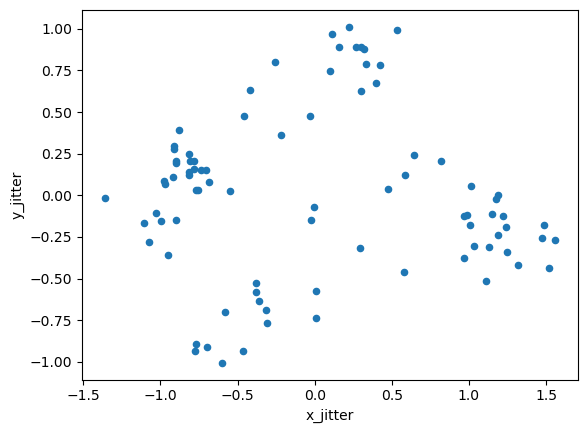

In [55]:
data['x_jitter'] = candy_2d[0] + np.random.randn(85)*.1 # The times 0.1 or 10% reduces noise to show clusters clearer
data['y_jitter'] = candy_2d[1] + np.random.randn(85) *.1
data.plot(kind='scatter', x='x_jitter', y='y_jitter')

##### Check data again before exporting

In [57]:
data.head() #shows 2 new 'x' and 'y' jitter columns

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_jitter,y_jitter
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.240299,-0.191484
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.186496,-0.235599
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,-0.003595,-0.071480
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,-0.023727,-0.145810
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.578427,-0.702420


In [59]:
# Export dataset to csv for uploading into Tableau 

data.to_csv('candy-data-pca.csv')

The Tableau conclusion was the 3 top treats you could give out this halloween to be the coolest house on the block as per the Winpercent would be:
- Reese's Peanut Butter Cup
- Starburst
- Twix

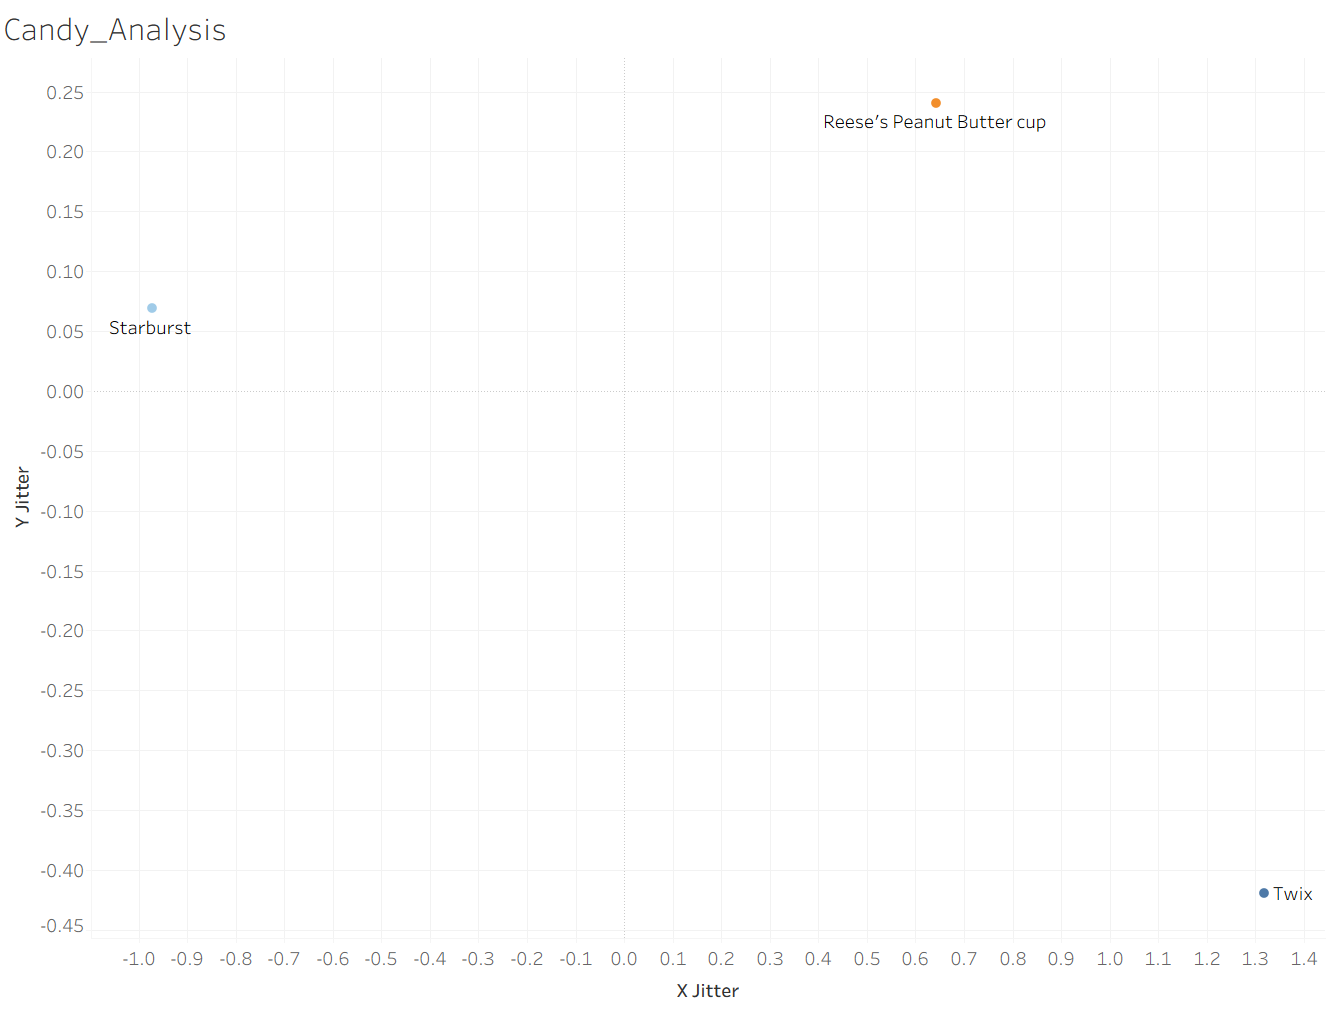